# Содержание
1.1 Инициализация

1.1.1 Загрузка данных

1.1.2 Исследование исходных данных

1.2 Коррекция типов данных

1.3 Исследование основных параметров

1.4 Изучение и обработка выбросов

1.5 Исследование основных факторов сахарного диабета

1.6 Общий вывод

# Инициализация проекта

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [3]:
data = pd.read_csv('D:/PythonWork/Machine learning and big data/data/diabetes_dataset.csv', delimiter=',', encoding='utf-8')

# Исследование исходных данных

Датасет содержит следующие поля:

* `Diabetes_012` - 0 - нет диабета, 1 - возможно есть, 2 - диабет
* `HighBP` - высокое ли артериальное давление (0 - нормальное, 1 - высокое)
* `HighChol` - высокий ли уровень холестерина (0 - нормальный, 1 - высокий)
* `CholCheck` - была ли проверка уровня холестерина за последние 5 лет (0 - нет, 1 - да)
* `BMI` - ИМТ
* `Smoker` - было ли скурено как минимум 100 сигарет за всю жизнь (0 - нет, 1 - да)
* `Stroke` - был ли инстульт (0 - нет, 1 - да)
* `HeartDiseaseorAttack` - была ли ишемическая болезнь сердца или инфаркт миокарда (0 - нет, 1 - да)
* `PhysActivity` - была ли физическая активность за последние 30 дней (0 - нет, 1 - да)
* `Fruits` - употребляется ли в пищу хотя бы один фрукт в день (0 - нет, 1 - да)
* `Veggies` - употребляется ли в пищу хотя бы один овощ в день (0 - нет, 1 - да)
* `HvyAlcoholConsump` - сильно пьющий человек (0 - нет, 1 - да)
* `AnyHealthcare` - имеется ли медицинская страховка (0 - нет, 1 - да)
* `NoDocbcCost` - Были ли случаи за последние 12 месяцев, когда вам нужно было обратиться к врачу,
              но вы не могли этого сделать из-за дороговизны? (0 - нет, 1 - да)
* `GenHlth` - В целом состояние здоровья (1 = отличное, 2 = очень хорошее,
          3 = хорошее, 4 = удовлетворительное, 5 = плохое)
* `MentHlth` - Сколько из последних 30 дней были эмоциональные проблемы
* `PhysHlth` - Сколько из последних 30 дней были болезни, травмы
* `DiffWalk` - тяжело ли подниматься по ступенькам (0 - нет, 1 - да)
* `Sex` - пол (0 - ж, 1 - м)
* `Age` - возраст (1 = 18-24, ..., 9 = 60-64, ...,  13 = 80 или старше)
* `Education` - образование (
              1 = Только детский сад
              2 = Младшая и средняя школа
              3, 4 = Старшая школа
              5 = Среднее профессиональное
              6 = Высшее
* `Income` - доход 1 = менее $10,000, ...,  5 = менее $35,000, ..., 8 = $75,000 и больше

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.head(20)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [6]:
# Проверка дубликатов
print(data.duplicated().sum())

23899


Дубликатов много. Это значит, что многие при прохождении опроса выбрали одинаковые варианты ответов. Скорее всего, это из-за того, что у них одинаковые симптомы, образ жизни и т.д.

In [7]:
# Проверка на наличие пропущенных значений
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Пропущенных значений нет.

<b>Получили следующую характеристику исходных данных:</b>
* Пропущенных значений нет
* HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex необходимо заменить на BOOL, поскольку
они принимают значения 0 или 1
* Diabetes_012, BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income необходимо заменить на INT,
т. к. их дробная часть равна 0

# Выводы и дальнейшие шаги

In [8]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<b>Следующий шаг - изменение типов данных</b>

# Коррекция типов данных

In [9]:
fields_to_bool = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                  'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                  'NoDocbcCost', 'DiffWalk', 'Sex']
fields_to_int = ['Diabetes_012', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for f in fields_to_bool:
    data[f] = data[f].astype(bool)
for f in fields_to_int:
    data[f] = data[f].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  bool 
 2   HighChol              253680 non-null  bool 
 3   CholCheck             253680 non-null  bool 
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  bool 
 6   Stroke                253680 non-null  bool 
 7   HeartDiseaseorAttack  253680 non-null  bool 
 8   PhysActivity          253680 non-null  bool 
 9   Fruits                253680 non-null  bool 
 10  Veggies               253680 non-null  bool 
 11  HvyAlcoholConsump     253680 non-null  bool 
 12  AnyHealthcare         253680 non-null  bool 
 13  NoDocbcCost           253680 non-null  bool 
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [10]:
print((data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False))

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


In [11]:
data.describe()

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,0.698160,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,0.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,2.000000,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


# EDA
## Исследование основных параметров заболевания сахарным диабетом

<b>Исследуемые параметры:</b>

* ИМТ
* Общий уровень здоровья
* Дней плохого ментального здоровья (из 30)
* Дней плохого физического самочувствия (из 30)
* Возраст
* Образование
* Уровень дохода

                 BMI        GenHlth       MentHlth       PhysHlth  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       2.511392       3.184772       4.242081   
std         6.608694       1.068477       7.412847       8.717951   
min        12.000000       1.000000       0.000000       0.000000   
25%        24.000000       2.000000       0.000000       0.000000   
50%        27.000000       2.000000       0.000000       0.000000   
75%        31.000000       3.000000       2.000000       3.000000   
max        98.000000       5.000000      30.000000      30.000000   

                 Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  
mean        8.032119       5.050434       6.053875  
std         3.054220       0.985774       2.071148  
min         1.000000       1.000000       1.000000  
25%         6.000000       4.000000       5.000000  
50%         8.000000       5.000000       7.000000  
75%    

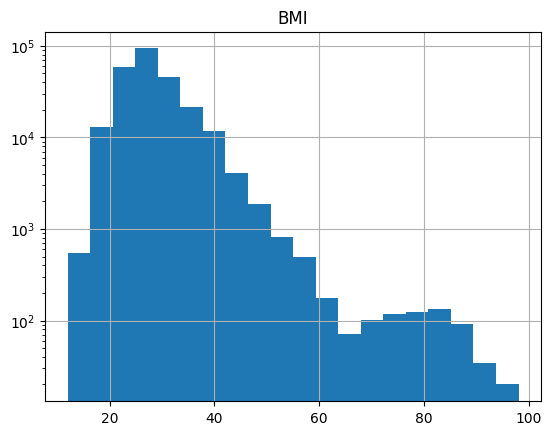

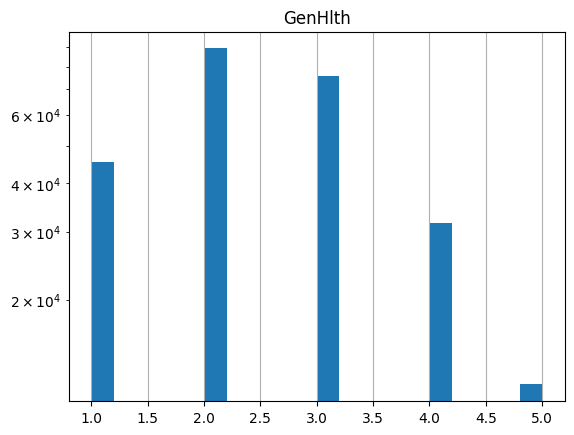

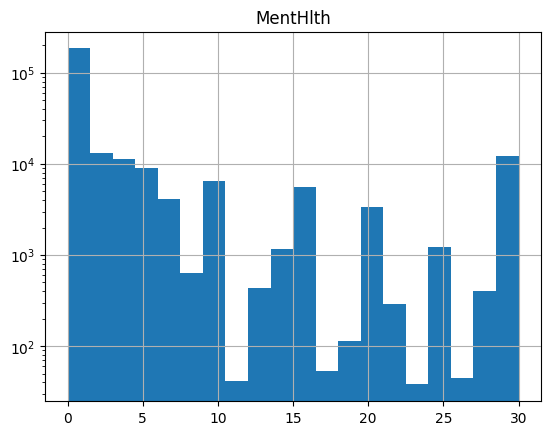

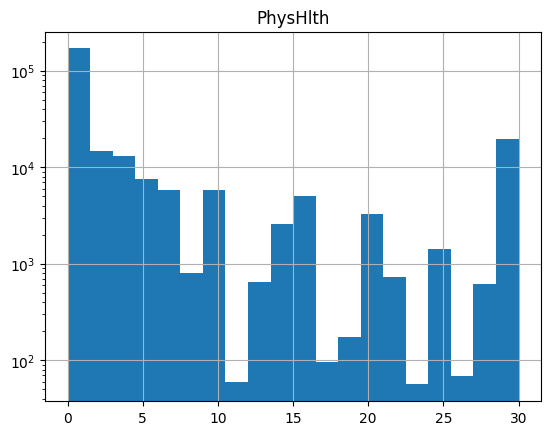

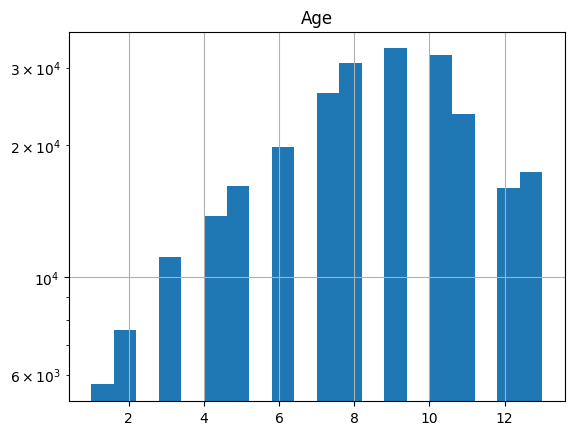

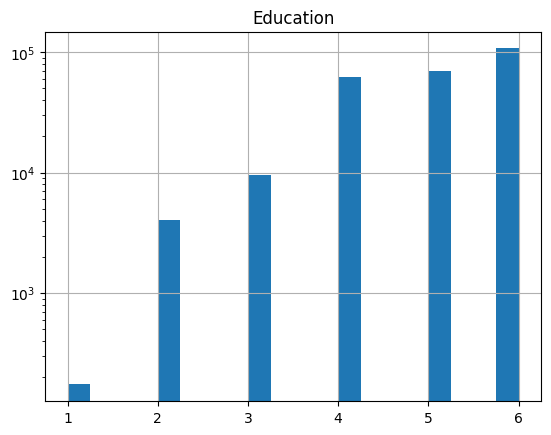

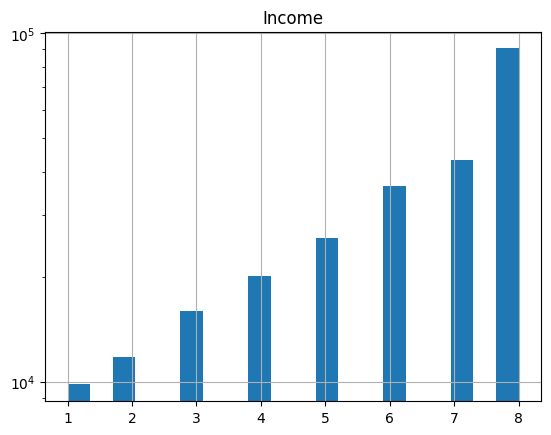

In [12]:
cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
print(data.describe()[cols])
for c in cols:
    data.hist(c, bins=20, log=True)
    plt.show()

Столбцы, имеющие выбросы: BMI, MentHlth, PhysHlth, Education, Income

## Изучение и обработка выбросов

Создадим DataFrame без этих выбросов.

In [13]:
outlier = data[['BMI']]
# 'MentHlth', 'PhysHlth', 'Education', 'Income' - 1 и 99 процентили
outlier

,BMI
0,40
1,25
2,28
3,27
4,24
...,...
253675,45
253676,18
253677,28
253678,23


In [14]:
# Определить нижние пределы для выбросов
q1 = outlier.quantile(0.25)
print(q1)

BMI    24.0
Name: 0.25, dtype: float64


In [15]:
# Определить верхние пределы для выбросов
q3 = outlier.quantile(0.75)
print(q3)

BMI    31.0
Name: 0.75, dtype: float64


In [16]:
# IQR-оценки
iqr = q3 - q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (q1 - 1.5 * iqr)) | (outlier > (q3 + 1.5 * iqr))).any(axis=1)]
data_filtered

,BMI
0,40
1,25
2,28
3,27
4,24
...,...
253674,27
253676,18
253677,28
253678,23


In [17]:
# Копирование индексов
index_list = list(data_filtered.index.values)

In [18]:
# Будем хранить данные без выбросов в отдельном DataFrame
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,True,True,True,40,True,False,False,False,False,...,True,False,5,18,15,True,False,9,4,3
1,0,False,False,False,25,True,False,False,True,False,...,False,True,3,0,0,False,False,7,6,1
2,0,True,True,True,28,False,False,False,False,True,...,True,True,5,30,30,True,False,9,4,8
3,0,True,False,True,27,False,False,False,True,True,...,True,False,2,0,0,False,False,11,3,6
4,0,True,True,True,24,False,False,False,True,True,...,True,False,2,3,0,False,False,11,5,4


Создадим гистограммы для отфильтрованных данных

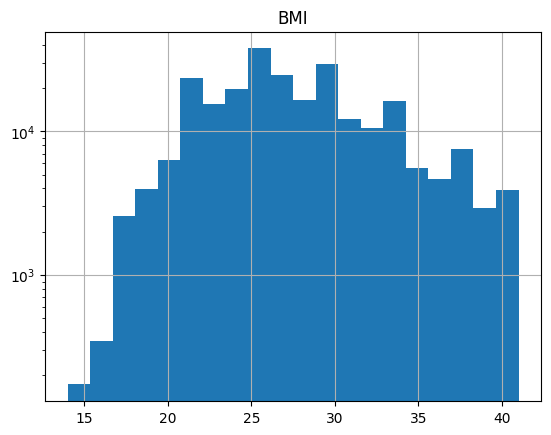

In [19]:
# Гистограммы с отфильтрованными выбросами
f_outlier = data_filtered[['BMI']]
for c in f_outlier:
    data_filtered.hist(c, bins=20, log=True)
    plt.show()

In [20]:
not_normal_outlier = data[['MentHlth', 'PhysHlth', 'Education', 'Income']]
# 'MentHlth', 'PhysHlth', 'Education', 'Income' - 1 и 99 процентили
not_normal_outlier

,MentHlth,PhysHlth,Education,Income
0,18,15,4,3
1,0,0,6,1
2,30,30,4,8
3,0,0,3,6
4,3,0,5,4
...,...,...,...,...
253675,0,5,6,7
253676,0,0,2,4
253677,0,0,5,2
253678,0,0,5,1


In [21]:
# Определить нижние пределы для выбросов
q1 = not_normal_outlier.quantile(0.01)
print(q1)

MentHlth     0.0
PhysHlth     0.0
Education    2.0
Income       1.0
Name: 0.01, dtype: float64


In [22]:
# Определить верхние пределы для выбросов
q3 = not_normal_outlier.quantile(0.99)
print(q3)

MentHlth     30.0
PhysHlth     30.0
Education     6.0
Income        8.0
Name: 0.99, dtype: float64


In [23]:

# Отфильтрованные данные, из которых удалены выбросы
iqr = q3 - q1
data_filtered_nn = not_normal_outlier[~((not_normal_outlier < q1) | (not_normal_outlier > q3)).any(axis=1)]
data_filtered_nn

,MentHlth,PhysHlth,Education,Income
0,18,15,4,3
1,0,0,6,1
2,30,30,4,8
3,0,0,3,6
4,3,0,5,4
...,...,...,...,...
253675,0,5,6,7
253676,0,0,2,4
253677,0,0,5,2
253678,0,0,5,1


In [24]:
# Копирование индексов
index_list = list(data_filtered.index.values)

# Будем хранить данные без выбросов в отдельном DataFrame
data_filtered_nn = data[data.index.isin(index_list)]
data_filtered_nn.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,True,True,True,40,True,False,False,False,False,...,True,False,5,18,15,True,False,9,4,3
1,0,False,False,False,25,True,False,False,True,False,...,False,True,3,0,0,False,False,7,6,1
2,0,True,True,True,28,False,False,False,False,True,...,True,True,5,30,30,True,False,9,4,8
3,0,True,False,True,27,False,False,False,True,True,...,True,False,2,0,0,False,False,11,3,6
4,0,True,True,True,24,False,False,False,True,True,...,True,False,2,3,0,False,False,11,5,4


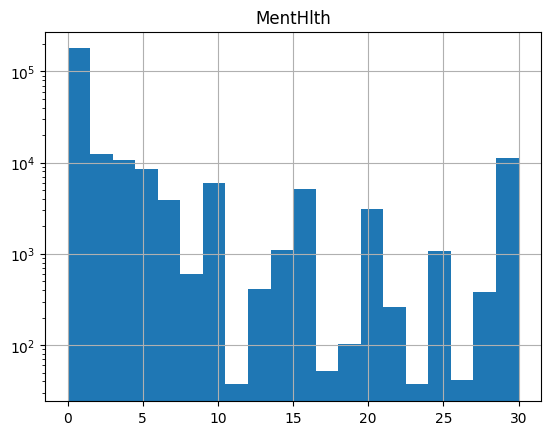

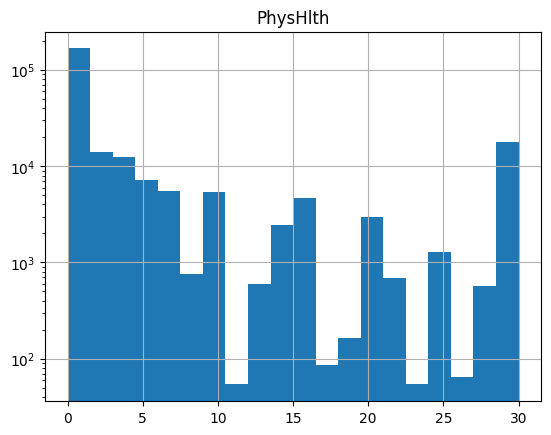

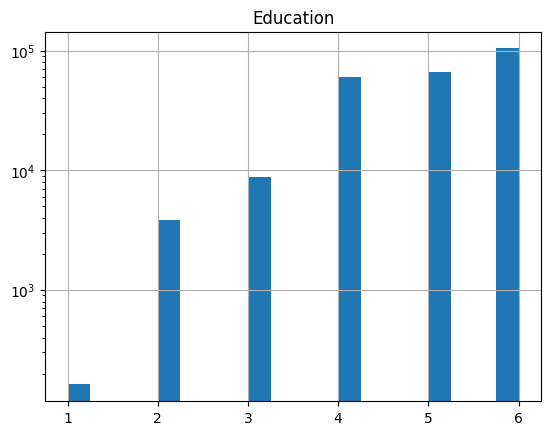

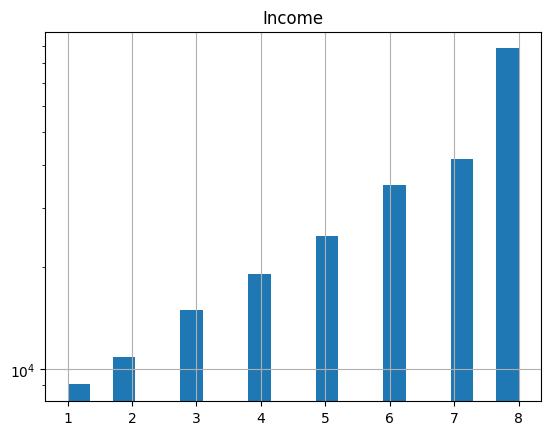

In [25]:
# Гистограммы с отфильтрованными выбросами
f_outlier = data_filtered[['MentHlth', 'PhysHlth', 'Education', 'Income']]
for c in f_outlier:
    data_filtered.hist(c, bins=20, log=True)
    plt.show()

<b>Заключение:</b>

- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов график выглядит более симметричным по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду.


- Судя по гистограмме ИМТ, большая часть значений распределена в диапазоне 15–40.


- Судя по гистограммам значений столбцов 'MentHlth' и 'PhysHlth', большинство респондентов довольны своим ментальным и физическим здоровьем.

## Изучение основных параметров без выбросов

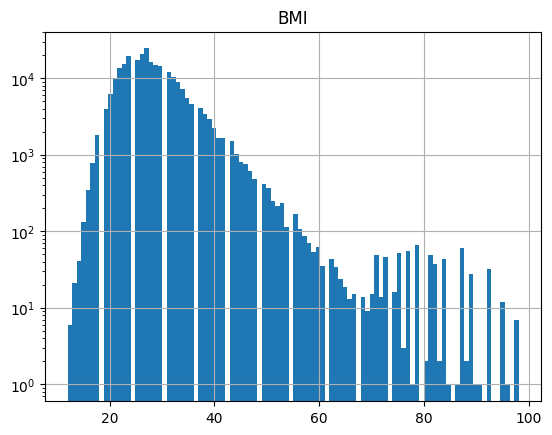

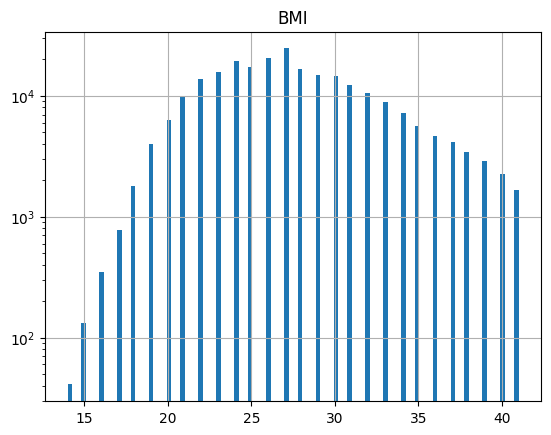

In [26]:
# Сравнение ИМТ с выбросами и без них
data.hist('BMI', bins=100, log=True)
plt.show()
data_filtered.hist('BMI', bins=100, log=True)
plt.show()

# **Заключение**:
- Выброс ИМТ был уменьшен с максимального 100 до 42.

- На гистограмме без выбросов видно, что большая часть ИМТ распределена в диапазоне 25 – 30. Максимальный ИМТ составляет 42.

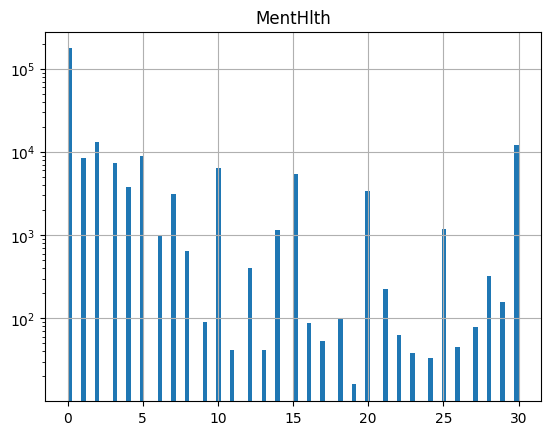

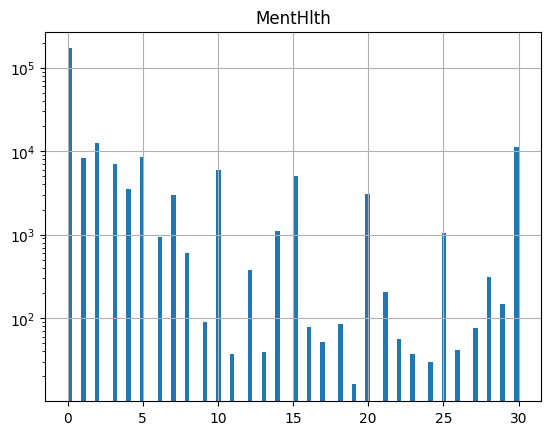

In [27]:
# Сравнение дней ментального здоровья с выбросами и без них
data.hist('MentHlth', bins=100, log=True)
plt.show()
data_filtered_nn.hist('MentHlth', bins=100, log=True)
plt.show()

**Заключение:**
- Выброс по дням ментального здоровья был уменьшен с максимума 30 до 5. Среднее значение по-прежнему выше медианного, поэтому гистограмма отображается вправо.

- Судя по гистограмме, большинство не испытывало плохого настроения за последние 30 дней.

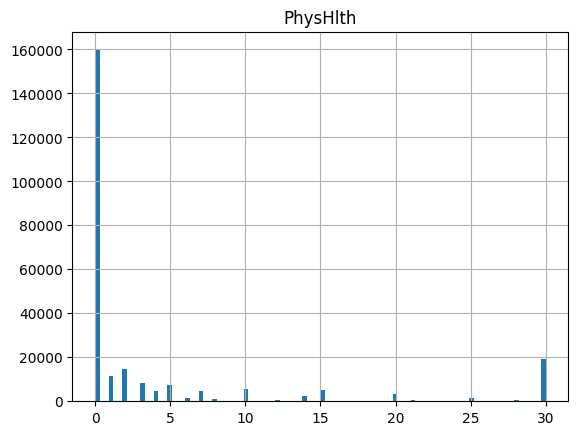

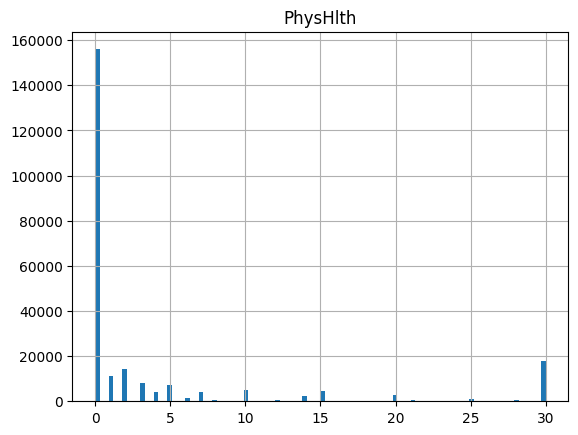

In [28]:
# Сравнение дней физического здоровья с выбросами и без них
data.hist('PhysHlth', bins=100)
plt.show()
data_filtered_nn.hist('PhysHlth', bins=100)
plt.show()

**Заключение:**
- Выброс по дням физического здоровья был уменьшен с максимума 30 до 7. Среднее значение по-прежнему выше медианного, поэтому гистограмма отображается вправо.

- Судя по гистограмме, большинство не болело и не получало травм за последние 30 дней.

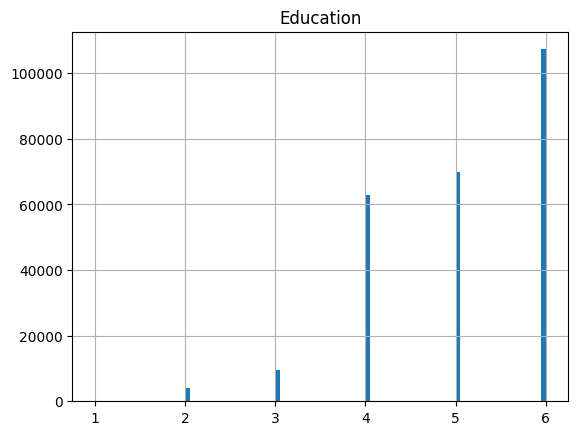

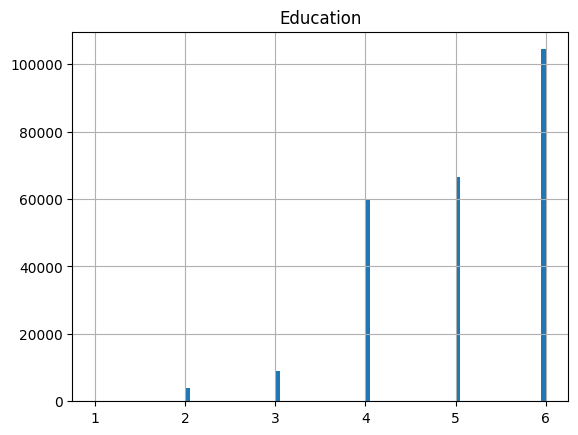

In [29]:
data.hist('Education', bins=100)
plt.show()
data_filtered_nn.hist('Education', bins=100)
plt.show()

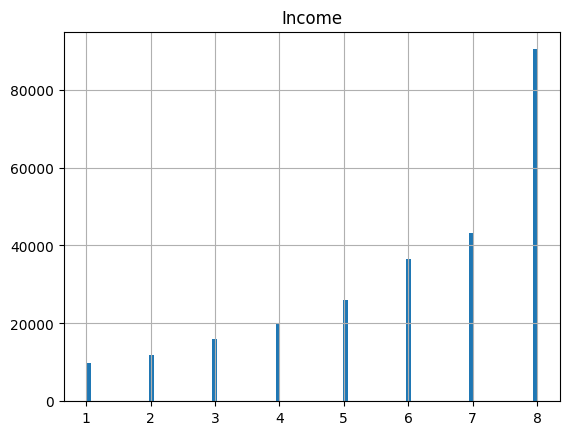

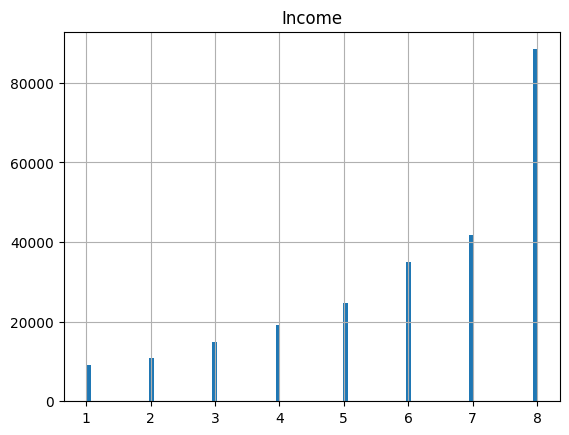

In [30]:
data.hist('Income', bins=100)
plt.show()
data_filtered_nn.hist('Income', bins=100)
plt.show()

## Факторы развития сахарного диабета
Рассмотрим зависимость от следующих характеристик:
* высокий холестерин,
* ИМТ,
* курит ли человек,
* ест ли фрукты,
* общее состояние здоровья,
* возраст,
* образование.

In [31]:
chol_diab = data_filtered[['Diabetes_012', 'HighChol']]
corr_chol = sc.stats.pointbiserialr(data_filtered['HighChol'].values, data_filtered['Diabetes_012'].values)
float(corr_chol.statistic)

0.2042702057052

**Заключение** :
<br>
Высокий уровень холестерина практически не влияет на развитие сахарного диабета. Коэффициент корреляции - положительный, это означает, что люди с высоким холестерином имеют слабый риск заболевания сахарным диабетом.

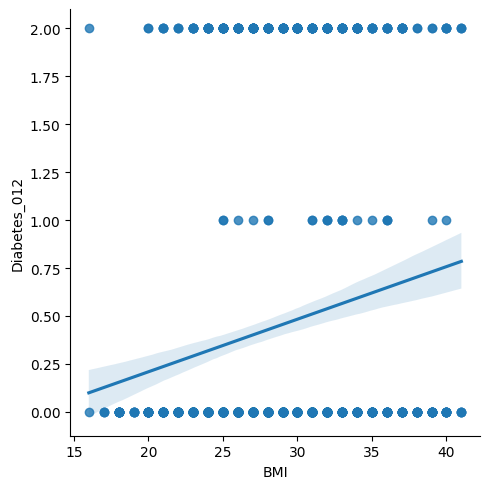

,Diabetes_012,BMI
Diabetes_012,1.000000,0.217202
BMI,0.217202,1.000000


In [32]:
sns.lmplot(x='BMI', y='Diabetes_012', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
bmi_diab = data_filtered[['Diabetes_012', 'BMI']]
corr_bmi = bmi_diab.corr(method='spearman')
corr_bmi

**Заключение** :
<br>
ИМТ несущественно повышает риск развития сахарного диабета. Поскольку коэффициент корреляции - положительный, это означает, что более полные люди больше подвержены риску заболевания сахарным диабетом.

In [33]:
# Вычисление корреляции
smoke_diab = data_filtered[['Diabetes_012', 'Smoker']]
corr_smoke = sc.stats.pointbiserialr(data_filtered['Smoker'].values, data_filtered['Diabetes_012'].values)
float(corr_smoke.statistic)

0.06355532464921794

**Заключение** :
<br>
То, что человек курит или нет, не влияет на развитие сахарного диабета, поскольку коэффициент корреляции - положительный и стремится к нулю.

In [34]:
# Вычисление корреляции
# fru_diab = data_filtered[['Diabetes_012', 'Fruits']]
# corr_fru = fru_diab.corr(method='kendall')
# corr_fru
fru_diab = data_filtered[['Diabetes_012', 'Fruits']]
corr_fru = sc.stats.pointbiserialr(data_filtered['Fruits'].values, data_filtered['Diabetes_012'].values)
float(corr_fru.statistic)

-0.03946311190894791

**Заключение** :
<br>
То, что человек ест или нет каждый день фрукты, не влияет на развитие сахарного диабета, поскольку коэффициент корреляции - отрицательный и стремится к нулю.

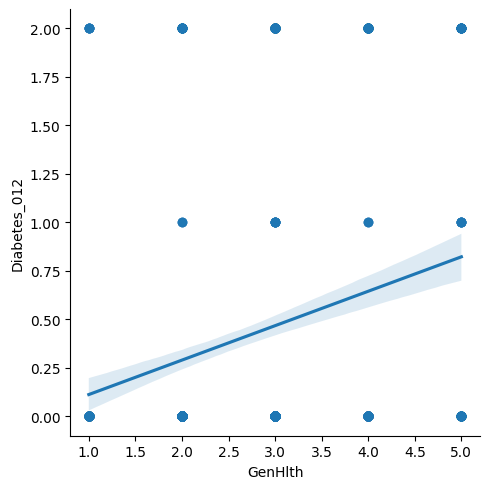

,Diabetes_012,GenHlth
Diabetes_012,1.000000,0.259161
GenHlth,0.259161,1.000000


In [35]:
sns.lmplot(x='GenHlth', y='Diabetes_012', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
gh_diab = data_filtered[['Diabetes_012', 'GenHlth']]
corr_gh = gh_diab.corr(method='kendall')
corr_gh

**Заключение** :
<br>
Общее состояние здоровья довольно прочно связано с риском развития сахарного диабета. Поскольку коэффициент корреляции - положительный, это означает, что менее здоровый человек не защищен от сахарного диабета.

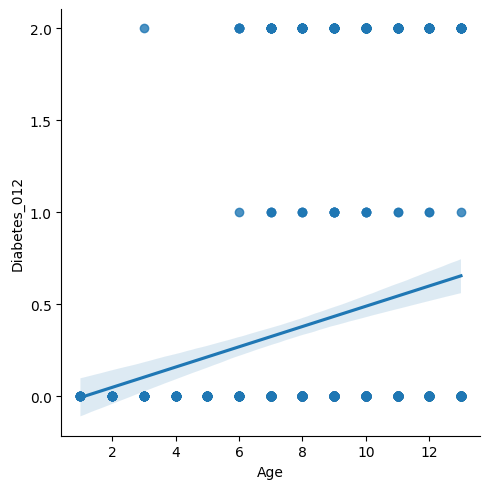

,Diabetes_012,Age
Diabetes_012,1.000000,0.162756
Age,0.162756,1.000000


In [36]:
sns.lmplot(x='Age', y='Diabetes_012', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
age_diab = data_filtered[['Diabetes_012', 'Age']]
corr_age = age_diab.corr(method='kendall')
corr_age

**Заключение** :
<br>
Возраст немного, но влияет на развитие сахарного диабета. Коэффициент корреляции положительный, поэтому вероятнее заболеть сахарным диабетом людям старшего возраста.

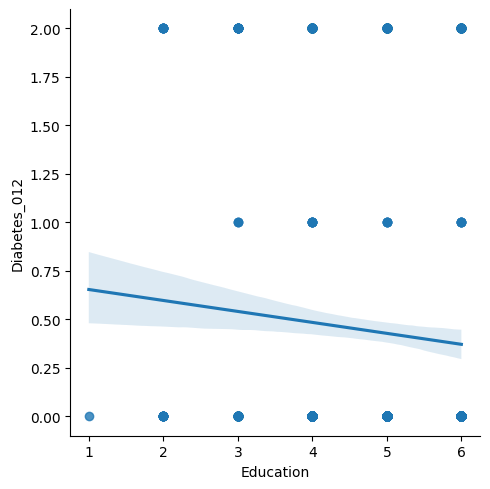

,Diabetes_012,Education
Diabetes_012,1.000000,-0.113137
Education,-0.113137,1.000000


In [37]:
sns.lmplot(x='Education', y='Diabetes_012', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
edu_diab = data_filtered[['Diabetes_012', 'Education']]
corr_edu = edu_diab.corr(method='kendall')
corr_edu

**Заключение** :
<br>
Степень образования крайне слабо влияет на развитие сахарного диабета. Отрицательный коэффицент корреляции говорит о том, что у людей с более высоким образованием меньший шанс заболеть сахарным диабетом. 

# Общие выводы:
В ходе лабораторной работы был обработан датасет, содержащий информацию о заболевании сахарным диабетом.

Были изменены типы данных столбцов (с float на int и bool);

Были устранены выбросы, находящиеся в столбцах BMI, MentHlth, PhysHlth;

Построены гистограммы, отражающие распределения этих признаков;

Определены наиболее вероятные факторы заболевания сахарным диабетом - чем хуже общее состояние здоровья, тем более вероятно заболевание диабетом.

In [38]:
data_filtered.to_csv('D:/PythonWork/Machine learning and big data/data/diabet_processed.csv')